# Using OpenCV, Python and Template Matching to play “Where’s Waldo?”
Take a look at the Where’s Waldo puzzle below. How long does it take you to find Waldo? 10 seconds? 30 seconds? Over a minute?

Now lets use our recently acquired knowledge to complete this task much faster :)

### Assginment
You should use template matching to find waldo in the below scene.

Use argparser for bonus points

### The Scene
Use this image below as your scene
![](https://camo.githubusercontent.com/fc58c6f4da2fb86ab15d13f64b90ad1eb3539137/68747470733a2f2f692e696d6775722e636f6d2f387645513472562e6a7067)

### Waldo
Use this image to find waldo in the scene
![](template2.jpg)

### Solution 1


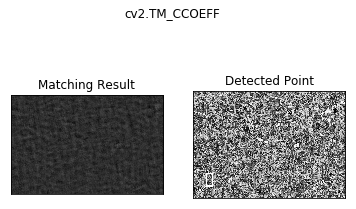

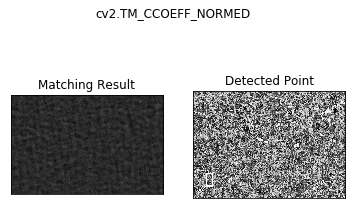

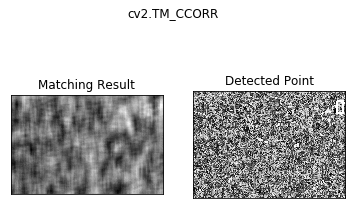

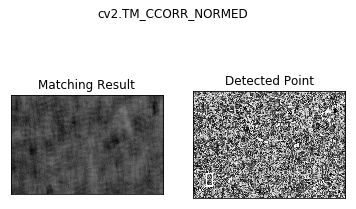

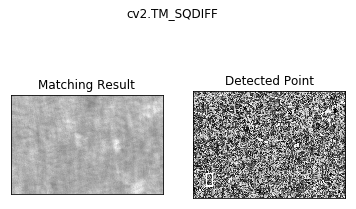

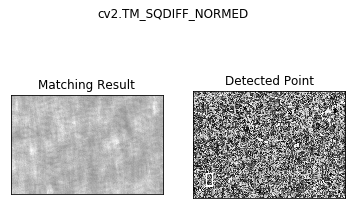

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('findWaldo.jpg',0)
img2 = img.copy()
template = cv2.imread('template2.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (255,0,255), 10)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

### Solution 2

We made a find_waldo.py file that incorporate this solution as well. It uses arparser and can be run from the console with two arguments: 1. the path to the image 2. the path to the template which to search for.
It saves the result image as res.png and opens the image in a window. This window can be closed by hitting escape.

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('findWaldo.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template2.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 7)

cv2.imwrite('res.png',img_rgb)

![](res.png)